**Data Cleaning & Missing Value Handling**

****

Real-world datasets are rarely analysis-ready. They often contain inconsistencies that can degrade statistical analysis and machine learning performance.

- Common Data Quality Issues

1. Missing values
2. Incorrect data types or formats
3. Duplicate records
4. Invalid or inconsistent entries
5. Irrelevant features
6. Poorly named columns


**Missing Data** : Missing values occur when data is not recorded, unavailable, or incorrectly captured.

Missing data may appear as:

1. NaN, NA, N/A

2. Empty cells

3. Placeholder values

4. Special symbols (-, --)

**Handling Missing Values**

****

Missing values must be handled carefully because improper treatment can bias analysis and reduce model accuracy.

1. Remove Data (use when missing portion is small)

- Use removal when only a small percentage of data is missing and the rows are not critical.

- Delete rows with missing values

- Remove duplicate records

- Remove erroneous outliers caused by data entry errors

- Example: If 2 out of 1,000 rows have missing income values, removing them will not significantly affect the analysis.

2.  Impute (Fill) Missing Values : Imputation is used when preserving data is important.

| Age | Salary |
|-----|--------|
| 25  | 30000  |
| 30  | 35000  |
| 28  | NaN    |
| 40  | 90000  |

We need to fill the missing salary value.

1. Mean Imputation

   Mean salary = (30000 + 35000 + 90000) / 3 = 51,667
   
   Missing value → 51,667 **Why use mean?**
  -  if data is normally distributed
  -  Simple
  -  Useful for statistical models
  - Limitations
    - Sensitive to outliers
    - In this example, 90,000 is an outlier, which inflates the mean.

2. Median Imputation

   Sorted salaries → 30,000, 35,000, 90,000
   Median = 35,000

   Missing value → 35,000 **Why use median?**
 - Robust to outliers
 - Preserves central tendency better
 - Preferred for skewed data


3. Mode Imputation (When to Use)

   Mode = most frequent value. Useful for: 1)Categorical data 2) Discrete values.

   Example
   | City      |
   |-----------|
   | Ahmedabad |
   | Surat     |
   | Ahmedabad |
   | NaN       |

   Mode = Ahmedabad → fill missing value with Ahmedabad

   - not usefull for continuous numerical data unless values repeat frequently.

3. Constant Value Replacement

   Replace missing values with: 0 , "Unknown" , "Not Available"

   Useful when missingness itself carries meaning.

In [26]:
import numpy as np   # Numerical computing library
# Provides:
# 1. Multidimensional array objects for homogeneous data
# 2. Fast vectorized mathematical operations
# 3. Linear algebra, Fourier transforms, and random number generation

import pandas as pd  # Data analysis and manipulation library
# Provides:
# 1. Data structures like Series and DataFrame
# 2. Tools for data cleaning and preprocessing
# 3. Data alignment, aggregation, and transformation
# 4. Easy handling of missing data and file I/O


In [27]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("harishkumardatalab/housing-price-prediction")

# print("Path to dataset files:", path)

In [28]:
# import os

# # List files in the downloaded directory
# file_names = os.listdir(path)

# # Assuming there's only one CSV file or we need to pick a specific one
# # Let's find the first .csv file in the directory
# csv_file = None
# for f_name in file_names:
#     if f_name.endswith('.csv'):
#         csv_file = f_name
#         break

# if csv_file:
#     full_csv_path = os.path.join(path, csv_file)
#     df = pd.read_csv(full_csv_path)
#     print(f"Successfully loaded {csv_file} into DataFrame.")
# else:
#     print("No CSV file found in the downloaded directory.")
#     print(f"Files in directory: {file_names}")

In [29]:
df = pd.read_csv('new_insurance_data.csv')
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [30]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [31]:
df.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [32]:
df.columns[df.isnull().any()]

Index(['age', 'bmi', 'children', 'Claim_Amount', 'past_consultations',
       'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary'],
      dtype='object')

In [33]:
null_obj_col = df.columns[(df.dtypes=='object') & (df.isnull().any())]
null_obj_col

Index([], dtype='object')

There is no object type of column which have null values. if there exist any column then we can fill that value with mode.

In [34]:
null_num_col = df.columns[(df.dtypes!='object') & (df.isnull().any())]
null_num_col

Index(['age', 'bmi', 'children', 'Claim_Amount', 'past_consultations',
       'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary'],
      dtype='object')

- Missing values were identified in several columns. Two imputation strategies were considered:

- If data is symmetric and free of outliers → mean imputation

- If data is skewed or contains outliers → median imputation

- Outlier detection was performed before selecting the imputation method.

First we have check outlier so for that we have following methiods:
1. Check distribution
   - Histogram
   - Boxplot
   - Skews right/left → use median

2. Check outliers
   - Boxplot
   - IQR method
   - Extreme values present → use median

- Outliers were examined using distribution plots (histogram, boxplot) and statistical methods to understand skewness and extreme values before applying imputation.



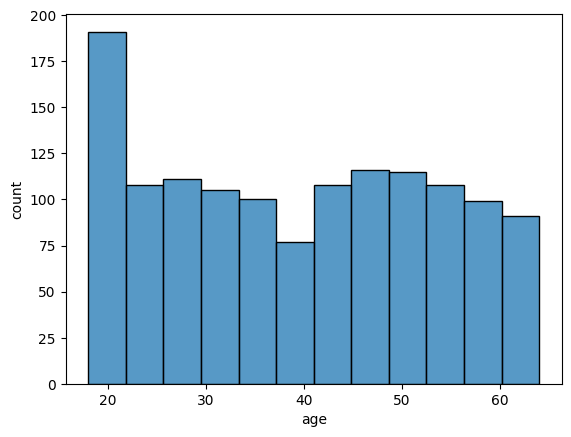

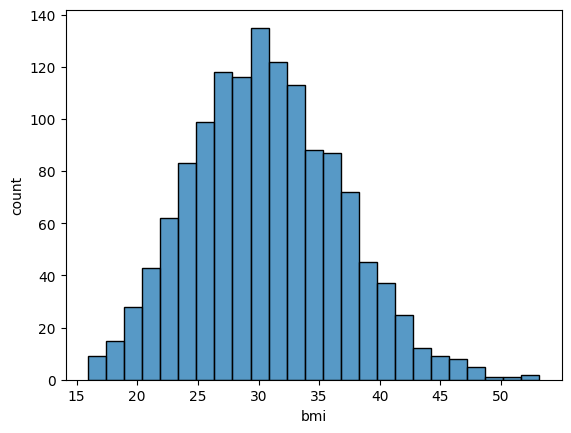

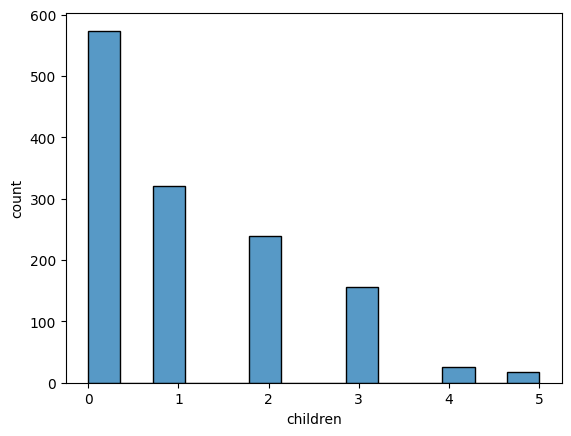

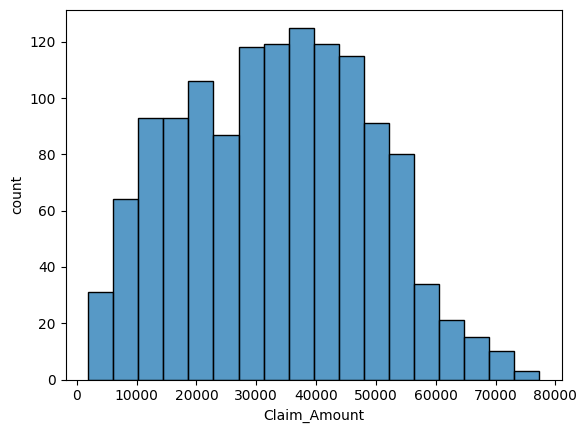

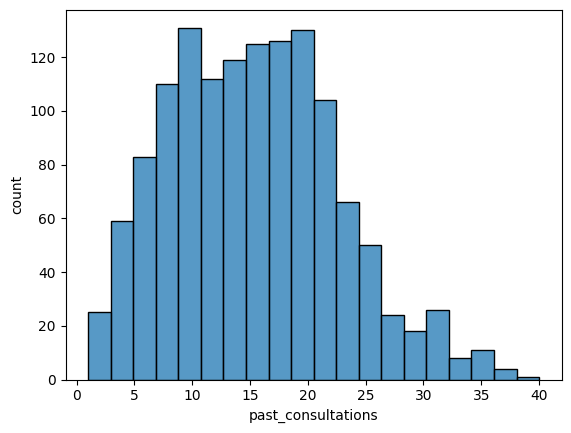

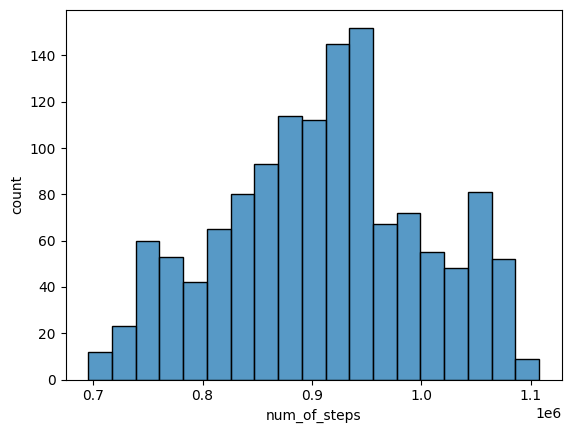

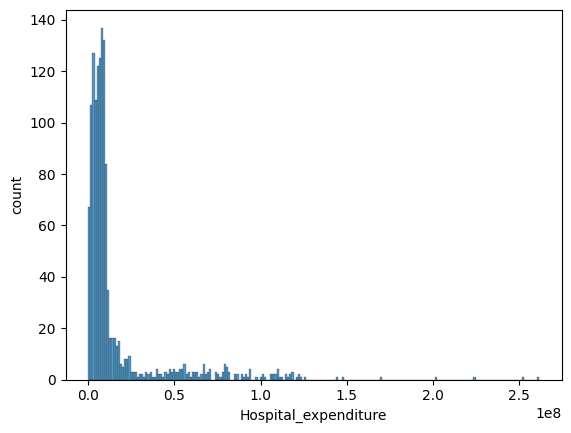

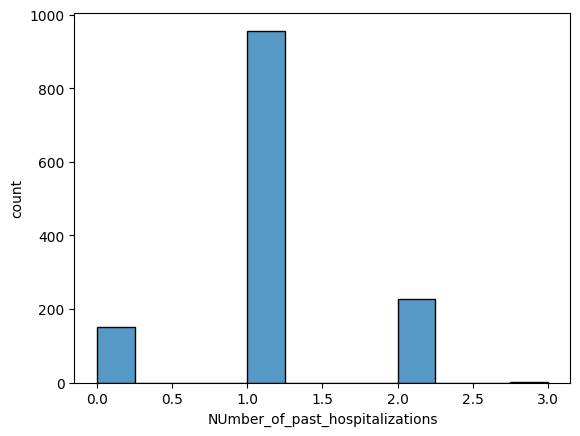

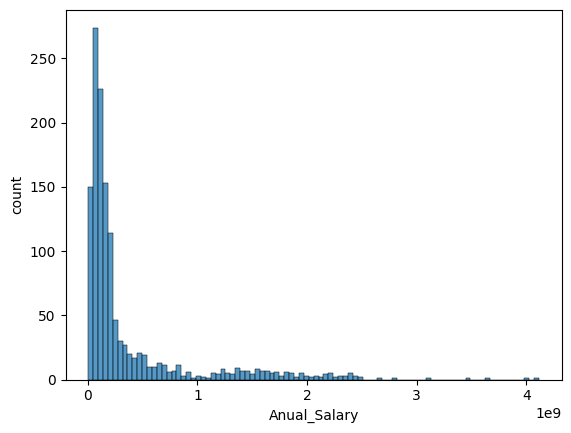

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

#Histogram plot
for col in df.columns[(df.dtypes != 'object') & (df.isnull().any())]:
    sns.histplot(df[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()

Histogram analysis revealed that Children, Hospital Expenditure, and Annual Salary are right-skewed. Therefore, median imputation was preferred for these variables to reduce the influence of extreme values.

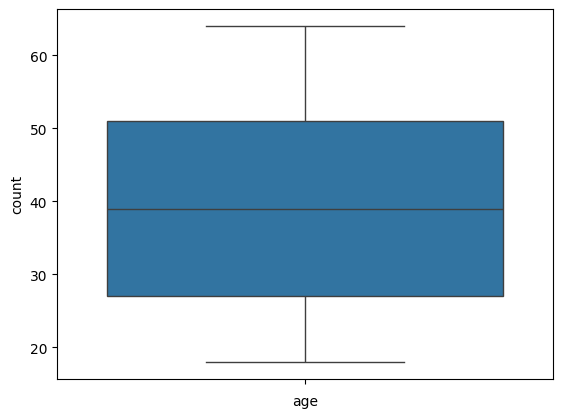

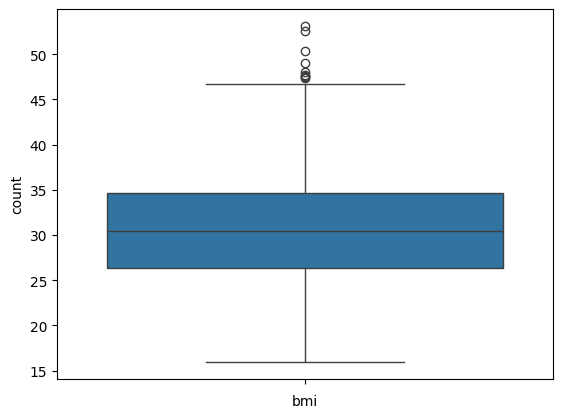

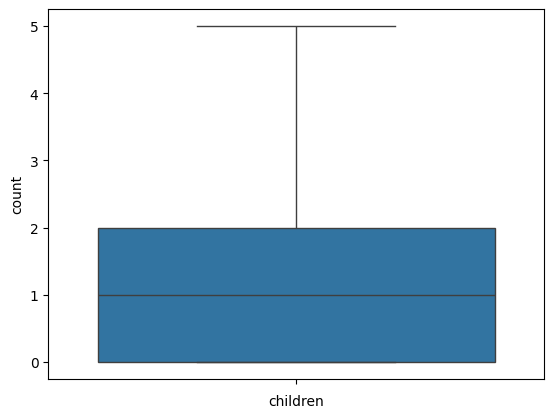

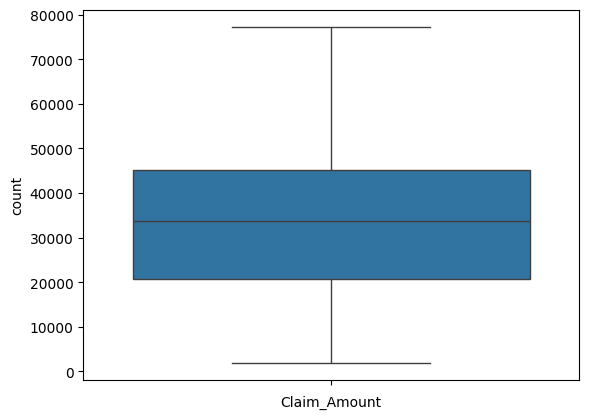

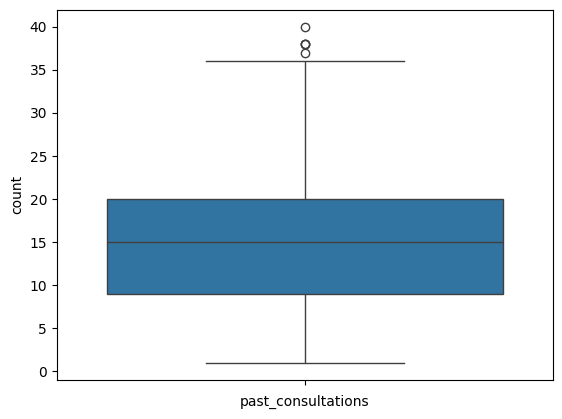

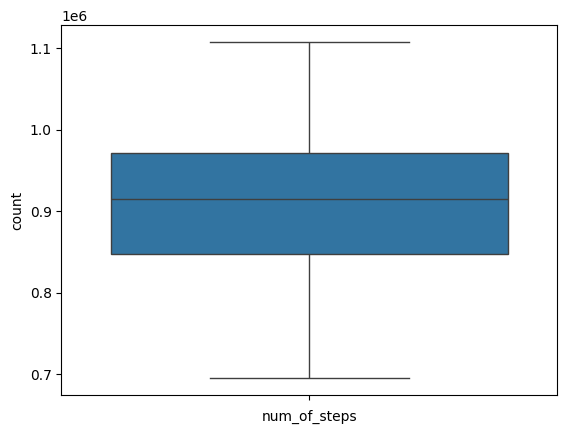

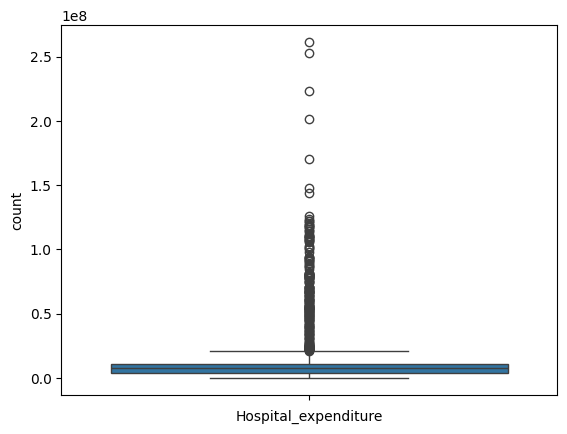

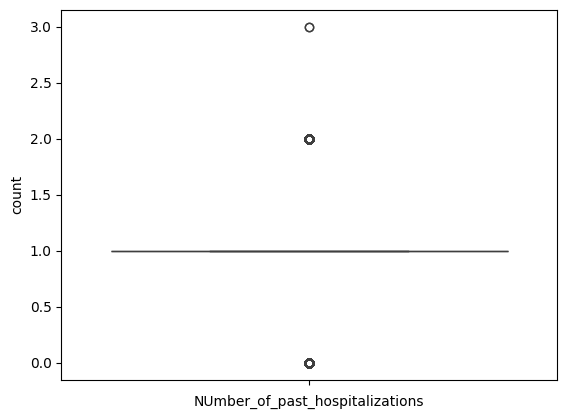

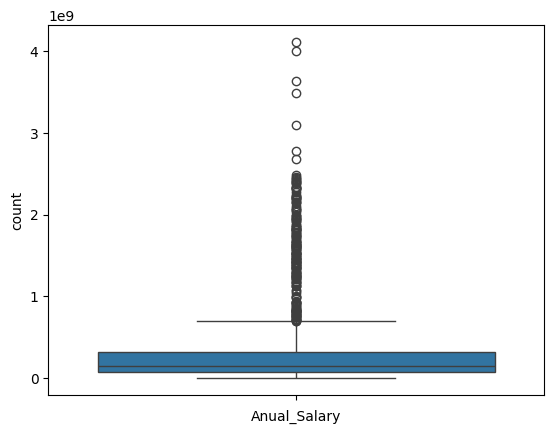

In [36]:
# Box plot
for col in df.columns[(df.dtypes != 'object') & (df.isnull().any())]:
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()

For the variable number of past hospitalizations, the values are discrete and limited (e.g., 0, 1, 2, 3, 4, 5), therefore, it should be treated as a count variable rather than continuous data. In such cases, boxplots may appear misleading because the data contains repeated values and a small range of possible outcomes. Instead, a bar plot (or value counts) should be used to understand the distribution and identify the most frequent values.

If the bar plot shows that multiple values share the highest frequency (i.e., the data is multimodal, such as 2 and 3 or 1, 2, and 4 occurring equally often), mode becomes ambiguous. Since the mean may produce unrealistic decimal values for count data, the median is preferred for imputation. The median provides a stable and realistic central value and remains reliable even when multiple modes exist.

**Observations from BOX plots**

 - BMI contains mild skewness and outliers, median imputation is more appropriate.
 - Hospital expenditure and annual salary clearly shows Right skewed.

In [37]:
# check skewness for numeric column only
skew_values = df.skew(numeric_only=True)
skew_values

,0
age,0.045514
bmi,0.283886
children,0.932063
Claim_Amount,0.098208
past_consultations,0.414046
num_of_steps,-0.081690
Hospital_expenditure,3.746780
NUmber_of_past_hospitalizations,0.116388
Anual_Salary,2.614588
charges,1.515880


In [38]:
# symmetric columns (safe for mean)
mean_cols = skew_values[(skew_values >= -0.5) & (skew_values <= 0.5)].index.tolist()

# moderately skewed
moderate_skew_cols = skew_values[(skew_values > 0.5) & (skew_values <= 1)].index.tolist()

# highly skewed columns (use median)
median_cols = skew_values[abs(skew_values) > 1].index.tolist()

print("Mean Imputation Columns:", mean_cols)
print("Moderately Skewed Columns:", moderate_skew_cols)
print("Median Imputation Columns:", median_cols)

Mean Imputation Columns: ['age', 'bmi', 'Claim_Amount', 'past_consultations', 'num_of_steps', 'NUmber_of_past_hospitalizations']
Moderately Skewed Columns: ['children']
Median Imputation Columns: ['Hospital_expenditure', 'Anual_Salary', 'charges']


In [39]:
# mean imputation
for col in mean_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# median imputation (moderate + high skew)
for col in moderate_skew_cols + median_cols:
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-1833877903.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-1833877903.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [40]:
outlier_list=['bmi','past_consultations','Hospital_expenditure','Anual_Salary']
for col in outlier_list:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    print(col,':',lower_limit,':',upper_limit)
    df=df[(df[col]>=lower_limit)&(df[col]<=upper_limit)]
df

bmi : 13.803125000000003 : 47.168124999999996
past_consultations : -7.5 : 36.5
Hospital_expenditure : -5960217.370000003 : 20753963.026000004
Anual_Salary : -117267392.5 : 383494075.98


,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,29.0,female,27.940,1.0,yes,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,southeast,19107.77960
1048,31.0,male,25.900,3.0,yes,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,southwest,19199.94400
1050,31.0,male,29.810,0.0,yes,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,southeast,19350.36890
1062,43.0,female,20.045,2.0,yes,21596.43846,10.0,994419.0,1.083030e+07,1.0,1.419361e+08,northeast,19798.05455


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1030 entries, 0 to 1069
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1030 non-null   float64
 1   sex                              1030 non-null   object 
 2   bmi                              1030 non-null   float64
 3   children                         1030 non-null   float64
 4   smoker                           1030 non-null   object 
 5   Claim_Amount                     1030 non-null   float64
 6   past_consultations               1030 non-null   float64
 7   num_of_steps                     1030 non-null   float64
 8   Hospital_expenditure             1030 non-null   float64
 9   NUmber_of_past_hospitalizations  1030 non-null   float64
 10  Anual_Salary                     1030 non-null   float64
 11  region                           1030 non-null   object 
 12  charges                  

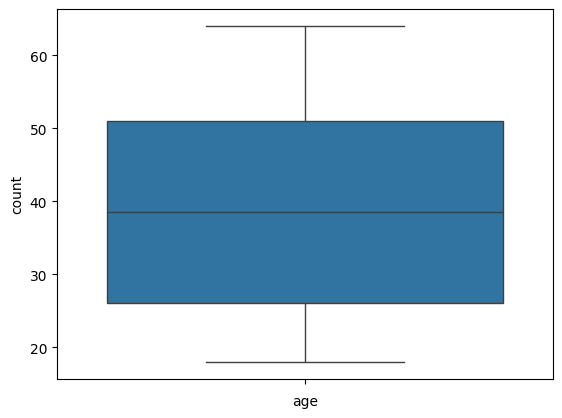

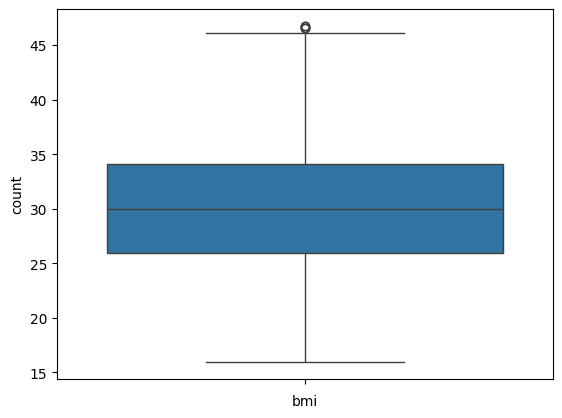

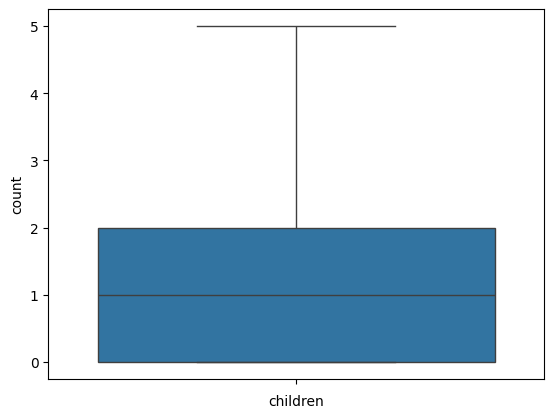

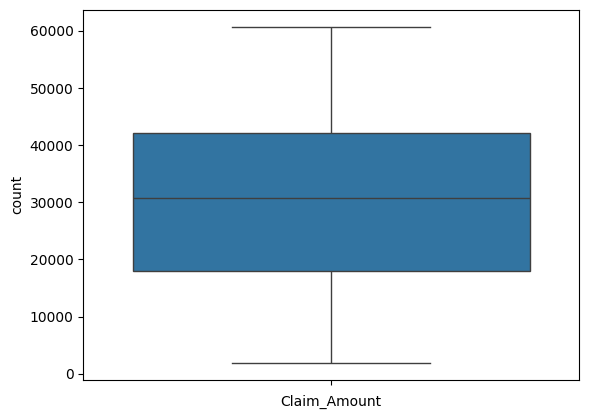

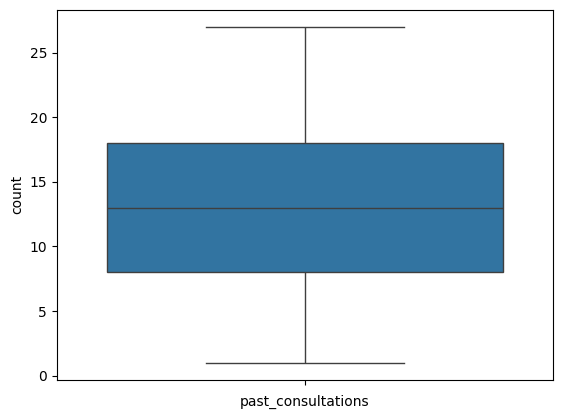

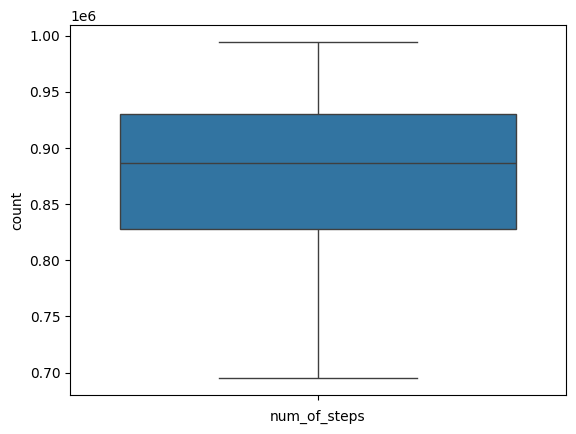

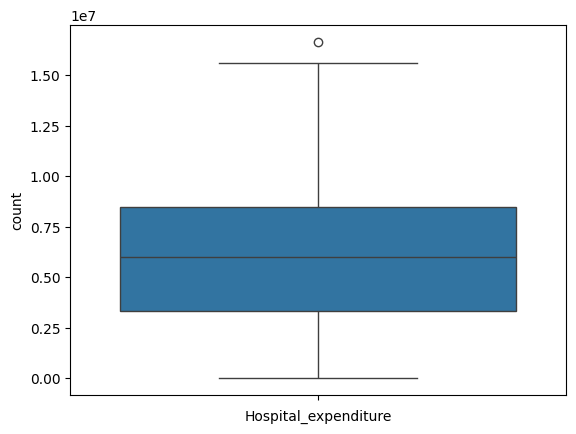

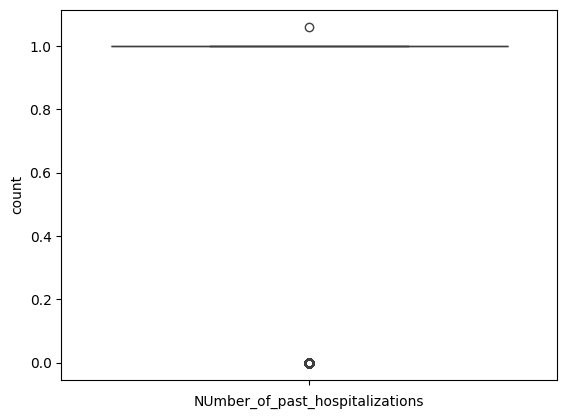

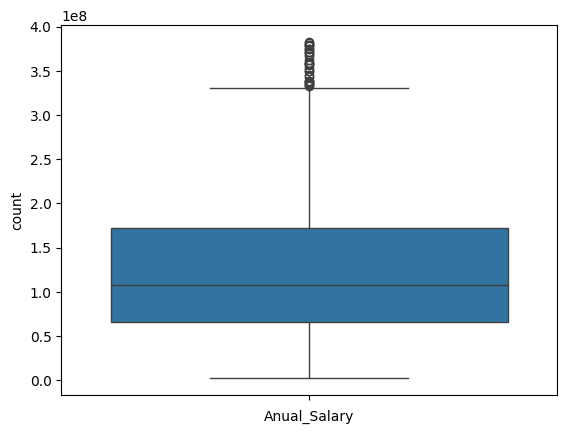

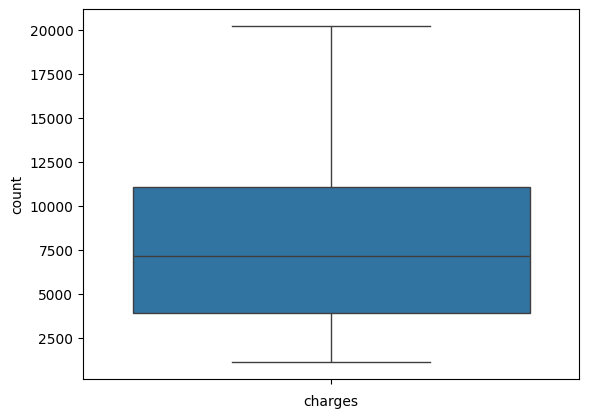

In [42]:
for col in df.columns:
    if df[col].dtype!='object':
        sns.boxplot(df[col])
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()

In [43]:
# convert object type data into numerical
df[[col for col in df.columns if df[col].dtype=='object']]

,sex,smoker,region
0,male,no,southeast
1,male,no,southeast
2,male,no,southeast
3,male,no,southeast
4,male,no,southeast
...,...,...,...
1046,female,yes,southeast
1048,male,yes,southwest
1050,male,yes,southeast
1062,female,yes,northeast


**Binary Categories (2 unique values)**

 - Examples:
   - sex → male / female
   - smoker → yes / no
 - Use Label Encoding (0 and 1)

**Nominal Categories (more than 2, no order)**

- Example: region → southeast, southwest, northeast, northwest
- Use One-Hot Encoding

In [44]:
# If we have only two categories then we can use mapping
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df

# Another method
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# df['sex'] = le.fit_transform(df['sex'])
# df['smoker'] = le.fit_transform(df['smoker'])
# df

# for more than two categories use One hot encoding
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False)
encoded=ohe.fit_transform(df[['region']])
encoded_df=pd.DataFrame(encoded,columns=ohe.get_feature_names_out())
df = df.reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)

df = pd.concat([df, encoded_df], axis=1)
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,18.0,0,23.210,0.0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390,0.0,0.0,1.0,0.0
1,18.0,0,30.140,0.0,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660,0.0,0.0,1.0,0.0
2,18.0,0,33.330,0.0,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070,0.0,0.0,1.0,0.0
3,18.0,0,33.660,0.0,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940,0.0,0.0,1.0,0.0
4,18.0,0,34.100,0.0,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,29.0,1,27.940,1.0,1,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,southeast,19107.77960,0.0,0.0,1.0,0.0
1026,31.0,0,25.900,3.0,1,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,southwest,19199.94400,0.0,0.0,0.0,1.0
1027,31.0,0,29.810,0.0,1,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,southeast,19350.36890,0.0,0.0,1.0,0.0
1028,43.0,1,20.045,2.0,1,21596.43846,10.0,994419.0,1.083030e+07,1.0,1.419361e+08,northeast,19798.05455,1.0,0.0,0.0,0.0


Binary variables were label encoded, and nominal variables were one-hot encoded to prepare the dataset for regression modeling.

In [45]:
df.drop('region',axis=1,inplace=True)
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,18.0,0,23.210,0.0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,1121.87390,0.0,0.0,1.0,0.0
1,18.0,0,30.140,0.0,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,1131.50660,0.0,0.0,1.0,0.0
2,18.0,0,33.330,0.0,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,1135.94070,0.0,0.0,1.0,0.0
3,18.0,0,33.660,0.0,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,1136.39940,0.0,0.0,1.0,0.0
4,18.0,0,34.100,0.0,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,1137.01100,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,29.0,1,27.940,1.0,1,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,19107.77960,0.0,0.0,1.0,0.0
1026,31.0,0,25.900,3.0,1,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,19199.94400,0.0,0.0,0.0,1.0
1027,31.0,0,29.810,0.0,1,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,19350.36890,0.0,0.0,1.0,0.0
1028,43.0,1,20.045,2.0,1,21596.43846,10.0,994419.0,1.083030e+07,1.0,1.419361e+08,19798.05455,1.0,0.0,0.0,0.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1030 non-null   float64
 1   sex                              1030 non-null   int64  
 2   bmi                              1030 non-null   float64
 3   children                         1030 non-null   float64
 4   smoker                           1030 non-null   int64  
 5   Claim_Amount                     1030 non-null   float64
 6   past_consultations               1030 non-null   float64
 7   num_of_steps                     1030 non-null   float64
 8   Hospital_expenditure             1030 non-null   float64
 9   NUmber_of_past_hospitalizations  1030 non-null   float64
 10  Anual_Salary                     1030 non-null   float64
 11  charges                          1030 non-null   float64
 12  region_northeast    

**Data Preprocessing Completed**

 - Handled missing values using appropriate imputation methods.

 - Checked distribution and treated outliers where necessary.

 - Converted categorical (object type) columns into numerical format.

 - Encoded binary and nominal variables for model compatibility.

 - Ensured all features are numeric and clean.

**The dataset is now clean, numerically encoded, and ready for model training.**